In [1]:
# import libraries
import numpy as np               
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import levene, shapiro, chi2_contingency, mannwhitneyu, ttest_ind, kruskal

In [3]:
data = pd.read_csv('penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
data_clean = data.dropna(subset='sex')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [9]:
data_cat =data_clean.select_dtypes(include = ['object'])
data_num = data_clean.select_dtypes(include = ['int64', 'float64'])


data_num.head()
data_cat.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,FEMALE
5,Adelie,Torgersen,MALE


In [11]:
datacat = data_clean[['species', 'island', 'sex']]
datanum = data_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]


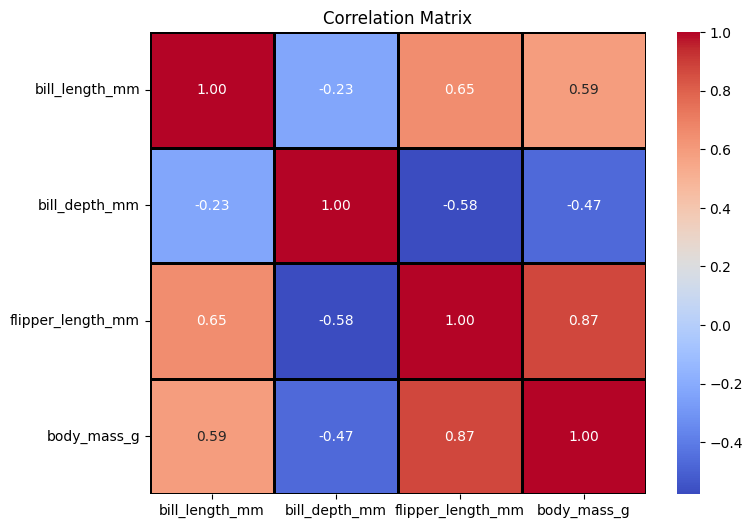

In [14]:
core = datanum.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(core, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [15]:
datanum.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [24]:
# ggby = data_clean.groupby('species').agg(['mean', 'std', 'count'])

groubydata = data_clean.groupby('species')['flipper_length_mm'].agg(['mean', 'std', 'count'])
groubydata

,mean,std,count
species,,,
Adelie,190.102740,6.521825,146
Chinstrap,195.823529,7.131894,68
Gentoo,217.235294,6.585431,119


In [25]:
# power analis to determine the sample size
from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=0.5, nobs1=30, alpha=0.05, alternative='two-sided')
print(f"Power of the test: {power:.2f}")

Power of the test: 0.48
